<a href="https://colab.research.google.com/github/NehaKumari500092077/SAR-Data/blob/main/test1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
from torch.utils.data import Dataset, DataLoader
from torch.utils.data import Subset
import random
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import torch.nn as nn

In [3]:
# The raw data URL is required to read the file directly from GitHub
url = "https://github.com/NehaKumari500092077/SAR-Data/raw/main/sar_complex_data.csv"

# Read the Excel file into a pandas DataFrame
dataset = pd.read_csv(url)

# Display the first 5 rows
display(dataset.head())

,Real_VV,Imag_VV,Real_VH,Imag_VH,s_moisture,s_roughness
0,0.031546,0.392571,-0.122639,0.045552,0.234919,2.076179
1,0.262882,-0.511744,-0.059568,0.091104,0.241678,2.076179
2,0.262882,-0.511744,-0.059568,0.091104,0.243905,2.076179
3,0.112164,-0.091133,-0.021024,0.087600,0.244922,2.076179
4,0.084123,-0.241853,-0.045552,-0.164688,0.240829,2.076179


 Calculate Magnitude and Phase for VV and VH Polarizations

In [6]:
# Calculate VV Magnitude
dataset['VV_Magnitude'] = np.sqrt(dataset['Real_VV']**2 + dataset['Imag_VV']**2)

# Calculate VV Phase (using arctan2 for correct quadrant handling)
dataset['VV_Phase'] = np.arctan2(dataset['Imag_VV'], dataset['Real_VV'])

# Calculate VH Magnitude
dataset['VH_Magnitude'] = np.sqrt(dataset['Real_VH']**2 + dataset['Imag_VH']**2)

# Calculate VH Phase (using arctan2 for correct quadrant handling)
dataset['VH_Phase'] = np.arctan2(dataset['Imag_VH'], dataset['Real_VH'])

print("Magnitude and Phase calculated successfully.")
print("First 5 rows with new calculated columns:")
print(dataset[['VV_Magnitude', 'VV_Phase', 'VH_Magnitude', 'VH_Phase']].head())



Magnitude and Phase calculated successfully.
First 5 rows with new calculated columns:
   VV_Magnitude  VV_Phase  VH_Magnitude  VH_Phase
0      0.393836  1.490611      0.130826  2.785957
1      0.575316 -1.096250      0.108849  2.149871
2      0.575316 -1.096250      0.108849  2.149871
3      0.144520 -0.682317      0.090088  1.806341
4      0.256065 -1.236059      0.170872 -1.840645


Visualize Distributions


Generating Histograms for Magnitude and Phase Distributions...


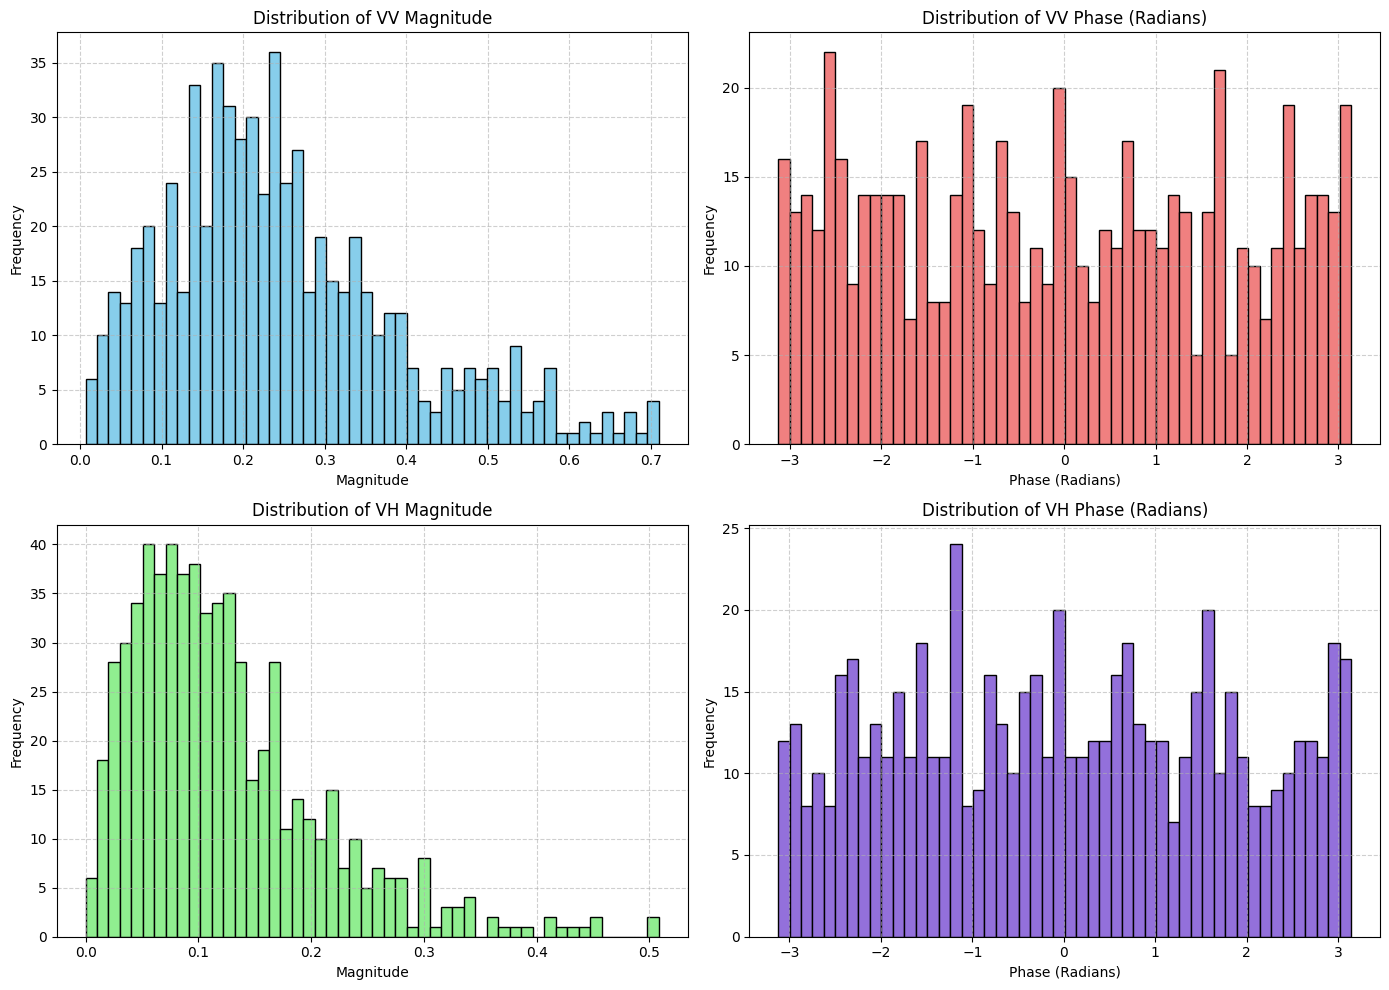


Descriptive Statistics for Calculated Values:
       VV_Magnitude    VV_Phase  VH_Magnitude    VH_Phase
count    638.000000  638.000000    638.000000  638.000000
mean       0.248682   -0.046446      0.123771    0.011710
std        0.145526    1.868669      0.085608    1.786092
min        0.006816   -3.128260      0.000000   -3.123076
25%        0.143147   -1.716205      0.062113   -1.514145
50%        0.224822   -0.045151      0.105005    0.000000
75%        0.325425    1.575314      0.164164    1.517089
max        0.709974    3.141593      0.508430    3.141593


In [10]:
print("\nGenerating Histograms for Magnitude and Phase Distributions...")

plt.figure(figsize=(14, 10))

# Histogram for VV Magnitude
plt.subplot(2, 2, 1)
plt.hist(dataset['VV_Magnitude'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of VV Magnitude')
plt.xlabel('Magnitude')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.6)

# Histogram for VV Phase
plt.subplot(2, 2, 2)
plt.hist(dataset['VV_Phase'], bins=50, color='lightcoral', edgecolor='black')
plt.title('Distribution of VV Phase (Radians)')
plt.xlabel('Phase (Radians)')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.6)

# Histogram for VH Magnitude
plt.subplot(2, 2, 3)
plt.hist(dataset['VH_Magnitude'], bins=50, color='lightgreen', edgecolor='black')
plt.title('Distribution of VH Magnitude')
plt.xlabel('Magnitude')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.6)

# Histogram for VH Phase
plt.subplot(2, 2, 4)
plt.hist(dataset['VH_Phase'], bins=50, color='mediumpurple', edgecolor='black')
plt.title('Distribution of VH Phase (Radians)')
plt.xlabel('Phase (Radians)')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

print("\nDescriptive Statistics for Calculated Values:")
print(dataset[['VV_Magnitude', 'VV_Phase', 'VH_Magnitude', 'VH_Phase']].describe())

 what the specific histograms tell us about the range and distribution of magnitude and phase in this dataset and how they might align with expected physical principles:

**VV Magnitude Distribution:** The histogram for VV magnitude shows a distribution that is somewhat skewed towards lower values, with a tail extending to higher magnitudes. The range is primarily between 0 and around 0.7. This distribution suggests that for most of the observed areas, the VV backscatter is relatively low, but there are instances of significantly higher backscatter. Higher VV magnitude can be associated with surface scattering from smoother surfaces or volume scattering from vegetation with vertical structures.

**VV Phase Distribution:** The VV phase histogram shows a distribution that is relatively spread out across the possible range of -π to +π radians. There isn't a strong peak at any specific phase value. This could indicate a variety of scattering mechanisms contributing to the VV backscatter across the dataset, or perhaps the influence of different surface properties and environmental conditions.

**VH Magnitude Distribution:** The VH magnitude histogram is also skewed towards lower values, with a range primarily between 0 and around 0.5. The values are generally lower than the VV magnitudes. This is expected because VH polarization involves cross-polarization scattering, which is often weaker than co-polarization (VV) backscatter, especially from smoother surfaces. Higher VH magnitude is often associated with volume scattering from vegetation or rough surfaces.

**VH Phase Distribution:** Similar to the VV phase, the VH phase distribution is also spread out across the -π to +π range, without a dominant peak. Cross-polarization phase can be complex and influenced by multiple scattering within the target.

**Alignment with Expected Physical Principles:**


*   The observation that VV magnitudes are generally higher than VH magnitudes aligns with the physical principle that co-polarization backscatter is typically stronger than cross-polarization backscatter, particularly from surfaces where single or double bounce scattering is dominant.

*   The spread-out nature of the phase distributions could be indicative of the diversity of the observed surface types and conditions within the dataset, leading to a variety of scattering mechanisms and associated phase shifts. If the dataset were dominated by a single type of surface (e.g., very smooth water), we might expect to see more concentrated phase distributions.




Generating Scatter Plots to Visualize Relationships with Ground Truth Data...


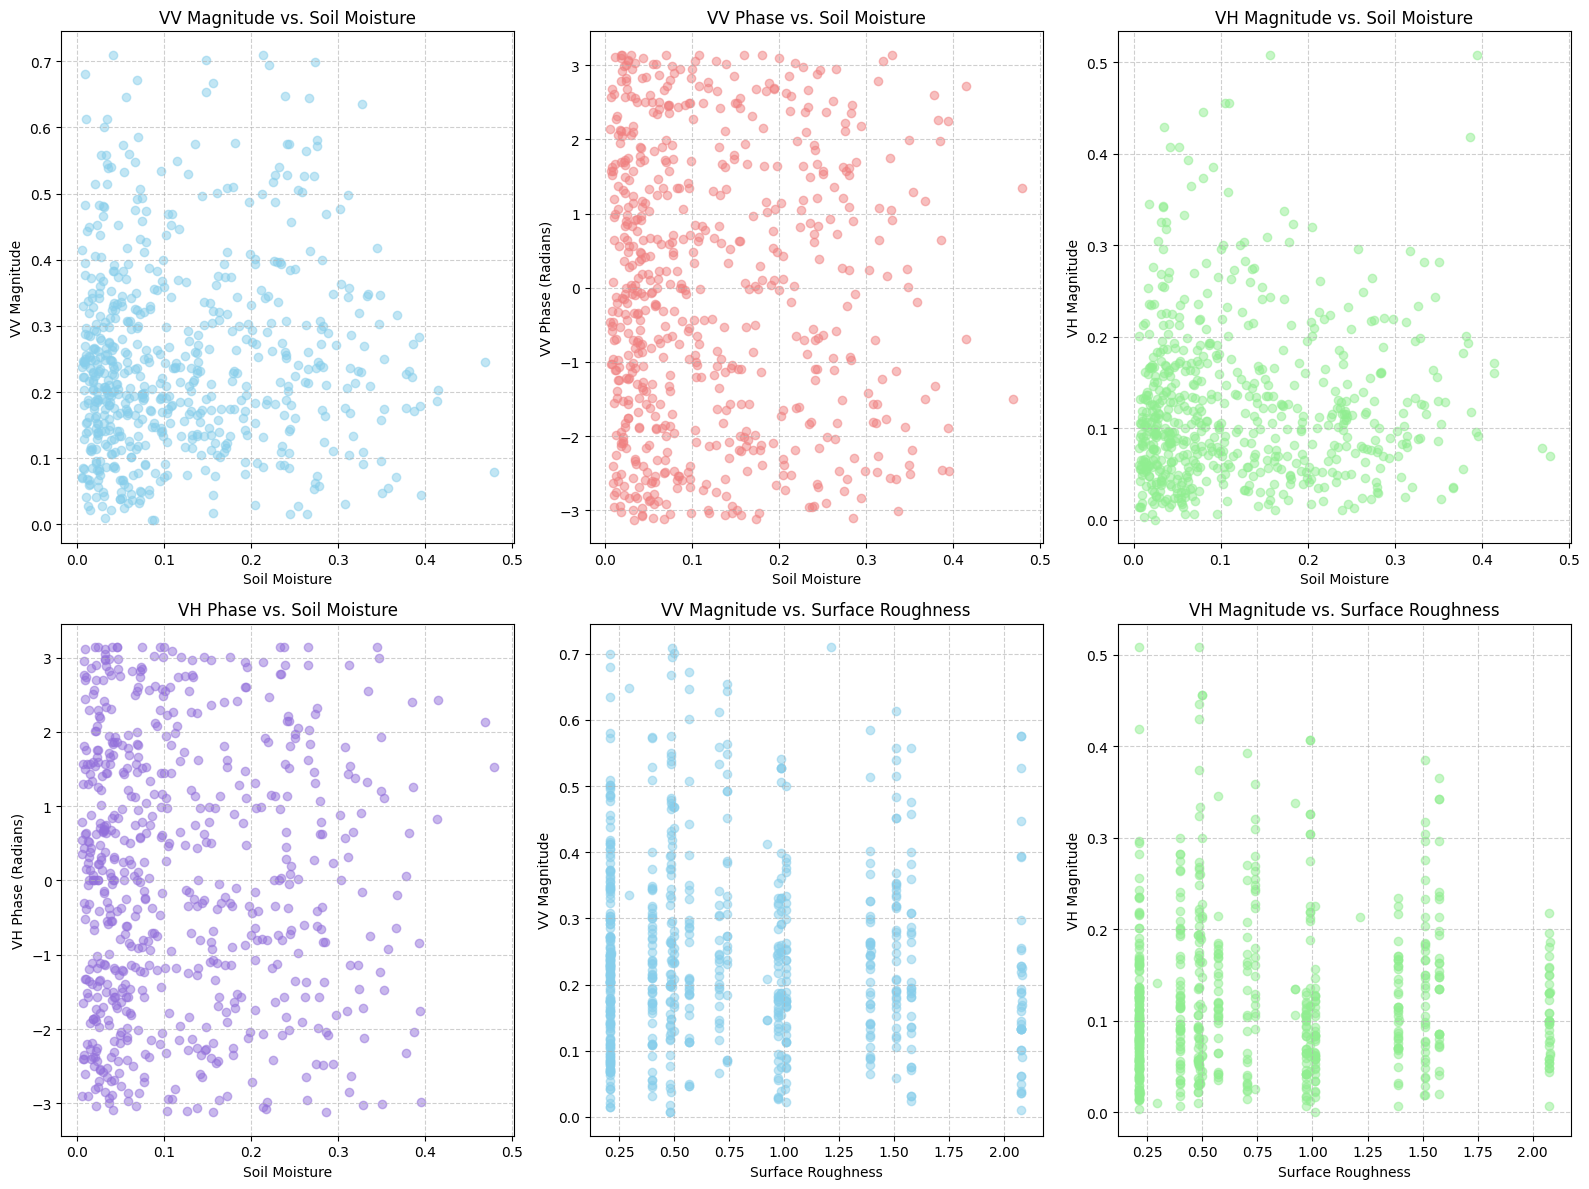

In [11]:
print("\nGenerating Scatter Plots to Visualize Relationships with Ground Truth Data...")

plt.figure(figsize=(16, 12))

# Scatter plot: VV Magnitude vs. Soil Moisture
plt.subplot(2, 3, 1)
plt.scatter(dataset['s_moisture'], dataset['VV_Magnitude'], alpha=0.5, color='skyblue')
plt.title('VV Magnitude vs. Soil Moisture')
plt.xlabel('Soil Moisture')
plt.ylabel('VV Magnitude')
plt.grid(True, linestyle='--', alpha=0.6)

# Scatter plot: VV Phase vs. Soil Moisture
plt.subplot(2, 3, 2)
plt.scatter(dataset['s_moisture'], dataset['VV_Phase'], alpha=0.5, color='lightcoral')
plt.title('VV Phase vs. Soil Moisture')
plt.xlabel('Soil Moisture')
plt.ylabel('VV Phase (Radians)')
plt.grid(True, linestyle='--', alpha=0.6)

# Scatter plot: VH Magnitude vs. Soil Moisture
plt.subplot(2, 3, 3)
plt.scatter(dataset['s_moisture'], dataset['VH_Magnitude'], alpha=0.5, color='lightgreen')
plt.title('VH Magnitude vs. Soil Moisture')
plt.xlabel('Soil Moisture')
plt.ylabel('VH Magnitude')
plt.grid(True, linestyle='--', alpha=0.6)

# Scatter plot: VH Phase vs. Soil Moisture
plt.subplot(2, 3, 4)
plt.scatter(dataset['s_moisture'], dataset['VH_Phase'], alpha=0.5, color='mediumpurple')
plt.title('VH Phase vs. Soil Moisture')
plt.xlabel('Soil Moisture')
plt.ylabel('VH Phase (Radians)')
plt.grid(True, linestyle='--', alpha=0.6)

# Scatter plot: VV Magnitude vs. Surface Roughness
plt.subplot(2, 3, 5)
plt.scatter(dataset['s_roughness'], dataset['VV_Magnitude'], alpha=0.5, color='skyblue')
plt.title('VV Magnitude vs. Surface Roughness')
plt.xlabel('Surface Roughness')
plt.ylabel('VV Magnitude')
plt.grid(True, linestyle='--', alpha=0.6)

# Scatter plot: VH Magnitude vs. Surface Roughness
plt.subplot(2, 3, 6)
plt.scatter(dataset['s_roughness'], dataset['VH_Magnitude'], alpha=0.5, color='lightgreen')
plt.title('VH Magnitude vs. Surface Roughness')
plt.xlabel('Surface Roughness')
plt.ylabel('VH Magnitude')
plt.grid(True, linestyle='--', alpha=0.6)


plt.tight_layout()
plt.show()

**Observations from the scatter plots:**

**1. VV Magnitude vs. Soil Moisture:**

The scatter plot shows a general trend where VV Magnitude tends to increase as Soil Moisture increases. This aligns with the physical principle that higher soil moisture content increases the dielectric constant of the soil, leading to stronger backscatter in the VV polarization. However, the relationship doesn't appear perfectly linear, and there's some scatter in the data points, suggesting that other factors might also be influencing the VV magnitude.

**2. VV Phase vs. Soil Moisture:**

The scatter plot for VV Phase against Soil Moisture doesn't show a clear or strong relationship. The points appear quite scattered across the range of phases for different soil moisture values. This might indicate that VV phase is less sensitive to soil moisture variations in this dataset, or that the relationship is more complex and influenced by other factors like surface structure or volume scattering.

**3. VH Magnitude vs. Soil Moisture:**

Similar to VV Magnitude, there appears to be a general increasing trend in VH Magnitude with increasing Soil Moisture. This is also expected as higher soil moisture can increase backscatter in cross-polarization, although often to a lesser extent than in co-polarization (VV). The scatter in this plot also suggests other contributing factors.

**4. VH Phase vs. Soil Moisture:**

The scatter plot for VH Phase versus Soil Moisture, like the VV phase plot, does not reveal a strong or clear linear relationship. The points are quite dispersed, suggesting that VH phase might not be a primary indicator of soil moisture in this dataset.

**5. VV Magnitude vs. Surface Roughness:**

The scatter plot of VV Magnitude against Surface Roughness seems to show a tendency for VV Magnitude to increase with increasing Surface Roughness, particularly at lower roughness values. However, at higher roughness values, the relationship appears less distinct. This is consistent with the understanding that surface roughness influences backscatter, with rougher surfaces generally leading to higher backscatter, especially in VV polarization, up to a certain point where the scattering becomes more diffuse.

**6. VH Magnitude vs. Surface Roughness:**

The scatter plot for VH Magnitude versus Surface Roughness also suggests an increase in VH Magnitude with increasing Surface Roughness. VH polarization is often more sensitive to volume scattering and surface roughness than VV polarization, especially at higher roughness values. The scatter in this plot indicates that while roughness is a factor, other variables likely play a role.

**Overall Observations:**

Both VV and VH magnitudes show some positive correlation with soil moisture and surface roughness, which aligns with expected physical principles.
The phase information (both VV and VH) does not exhibit a clear linear relationship with either soil moisture or surface roughness in these scatter plots. This doesn't necessarily mean phase is not useful, but its relationship might be more complex or indirect.
The scatter in all the plots suggests that soil moisture and surface roughness are not the only factors influencing the SAR backscatter; other environmental or surface parameters not included in this dataset might also be at play.


Calculating Correlation Matrix...


,Real_VV,Imag_VV,Real_VH,Imag_VH,s_moisture,s_roughness,VV_Magnitude,VV_Phase,VH_Magnitude,VH_Phase
Real_VV,1.000000,0.011172,-0.056259,0.016275,-0.010054,0.019642,-0.037879,0.021905,0.095312,-0.003618
Imag_VV,0.011172,1.000000,0.019766,-0.016966,0.016656,0.012867,-0.033496,0.652998,-0.095877,0.035059
Real_VH,-0.056259,0.019766,1.000000,0.072103,-0.013553,-0.022531,-0.029731,-0.012581,-0.056279,0.034093
Imag_VH,0.016275,-0.016966,0.072103,1.000000,-0.029400,-0.049182,-0.018108,0.015478,-0.004986,0.627548
s_moisture,-0.010054,0.016656,-0.013553,-0.029400,1.000000,-0.214778,0.073739,-0.008978,0.042370,-0.009695
s_roughness,0.019642,0.012867,-0.022531,-0.049182,-0.214778,1.000000,-0.063863,-0.050441,0.039789,-0.045321
VV_Magnitude,-0.037879,-0.033496,-0.029731,-0.018108,0.073739,-0.063863,1.000000,-0.040712,0.237362,-0.040219
VV_Phase,0.021905,0.652998,-0.012581,0.015478,-0.008978,-0.050441,-0.040712,1.000000,-0.052285,0.031956
VH_Magnitude,0.095312,-0.095877,-0.056279,-0.004986,0.042370,0.039789,0.237362,-0.052285,1.000000,-0.058761
VH_Phase,-0.003618,0.035059,0.034093,0.627548,-0.009695,-0.045321,-0.040219,0.031956,-0.058761,1.000000



Visualizing Correlation Matrix as a Heatmap...


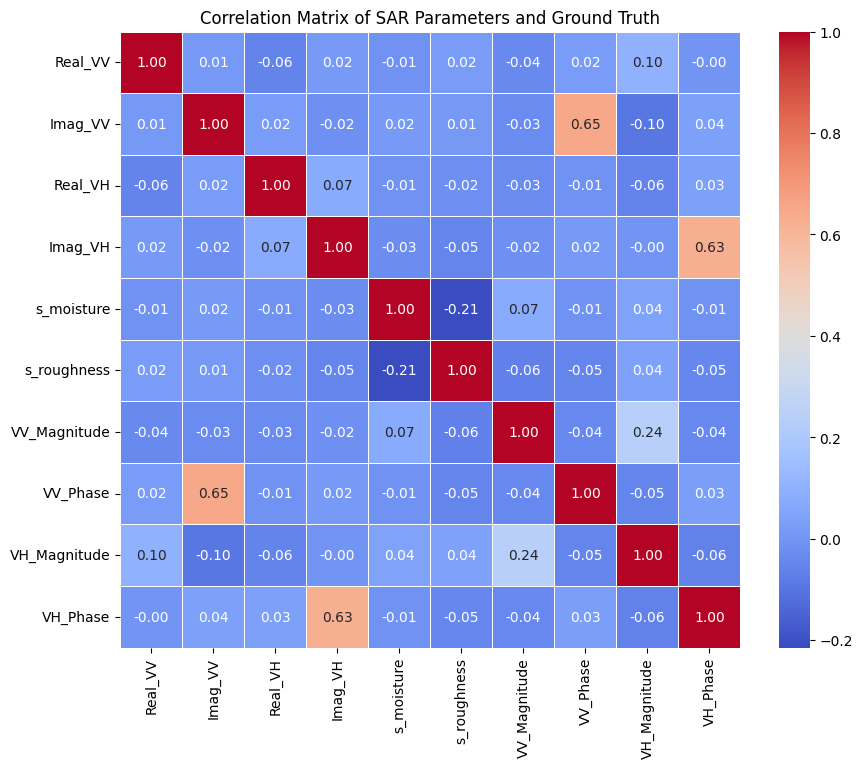

In [12]:
print("\nCalculating Correlation Matrix...")

# Select only the numerical columns for correlation calculation
numerical_cols = dataset.select_dtypes(include=np.number).columns
correlation_matrix = dataset[numerical_cols].corr()

# Display the correlation matrix
display(correlation_matrix)

print("\nVisualizing Correlation Matrix as a Heatmap...")

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of SAR Parameters and Ground Truth')
plt.show()

** The correlations between the SAR parameters and the ground truth variables (s_moisture and s_roughness) in the correlation matrix and heatmap:**

**Soil Moisture (s_moisture):**

*   s_moisture has a positive correlation with VV_Magnitude (0.07) and VH_Magnitude (0.04). These are weak positive correlations, but they align with the expectation that higher soil moisture increases backscatter, especially in magnitude.

*  The correlations between s_moisture and the phase values (VV_Phase: -0.01, VH_Phase: -0.01) are very close to zero, indicating essentially no linear correlation. This supports the observation from the scatter plots that phase doesn't have a clear linear relationship with soil moisture in this dataset.


**Surface Roughness (s_roughness):**


*  s_roughness has a very weak negative correlation with VV_Magnitude (-0.06) and a very weak positive correlation with VH_Magnitude (0.04). While we expected some positive correlation with roughness, particularly for VH, these values are quite low, suggesting that linear correlation may not fully capture the relationship, or that other factors are more dominant.

*   Similar to soil moisture, the correlations between s_roughness and the phase values (VV_Phase: -0.05, VH_Phase: -0.05) are very close to zero, indicating no significant linear relationship.


**In summary, based on the linear correlation coefficients:**



*  There are weak positive linear correlations between the magnitudes (VV and VH) and soil moisture, which is physically expected.

*   The linear correlations between the magnitudes and surface roughness are very weak.

*   The linear correlations between the phase values (VV and VH) and both soil moisture and surface roughness are negligible.

**Imp:** correlation matrix measures linear relationships. It's possible that non-linear relationships exist between these variables, especially with phase, which is not well-captured by this analysis.



1.   **Feature Engineering (More Advanced):** Explore creating more complex features, such as polarization ratios (e.g., VV/VH magnitude ratio) or polarization indices, which are often used in SAR applications.

2.   **Outlier Detection:** Identify and analyze potential outliers in the data that might be influencing the relationships observed in the scatter plots.



# Task
Analyze the provided SAR data and ground truth data ("soil moisture and surface roughness") by performing feature engineering (creating polarization ratios and indices), detecting outliers, and then building and evaluating a machine learning model to predict soil moisture and/or surface roughness.

## Feature engineering

### Subtask:
Create new features from the existing SAR data, such as polarization ratios and indices.


**Reasoning**:
Create polarization ratio and phase difference features as instructed.



In [13]:
# Create VV to VH Magnitude Ratio
# Handle division by zero by adding a small epsilon or replacing infinite values
dataset['VV_to_VH_ratio'] = dataset['VV_Magnitude'] / (dataset['VH_Magnitude'])
dataset['VV_to_VH_ratio'] = dataset['VV_to_VH_ratio'].replace([np.inf, -np.inf], np.nan)

# Create VV minus VH Phase Difference
dataset['VV_minus_VH_phase_diff'] = dataset['VV_Phase'] - dataset['VH_Phase']

# Display the first 5 rows with new features
display(dataset[['VV_Magnitude', 'VH_Magnitude', 'VV_Phase', 'VH_Phase', 'VV_to_VH_ratio', 'VV_minus_VH_phase_diff']].head())

,VV_Magnitude,VH_Magnitude,VV_Phase,VH_Phase,VV_to_VH_ratio,VV_minus_VH_phase_diff
0,0.393836,0.130826,1.490611,2.785957,3.010386,-1.295345
1,0.575316,0.108849,-1.096250,2.149871,5.285438,-3.246121
2,0.575316,0.108849,-1.096250,2.149871,5.285438,-3.246121
3,0.144520,0.090088,-0.682317,1.806341,1.604211,-2.488658
4,0.256065,0.170872,-1.236059,-1.840645,1.498582,0.604586


## Outlier detection

### Subtask:
Identify and analyze potential outliers in the dataset.


**Reasoning**:
Generate box plots for each numerical column to visualize potential outliers.




Generating Box Plots to Visualize Potential Outliers...


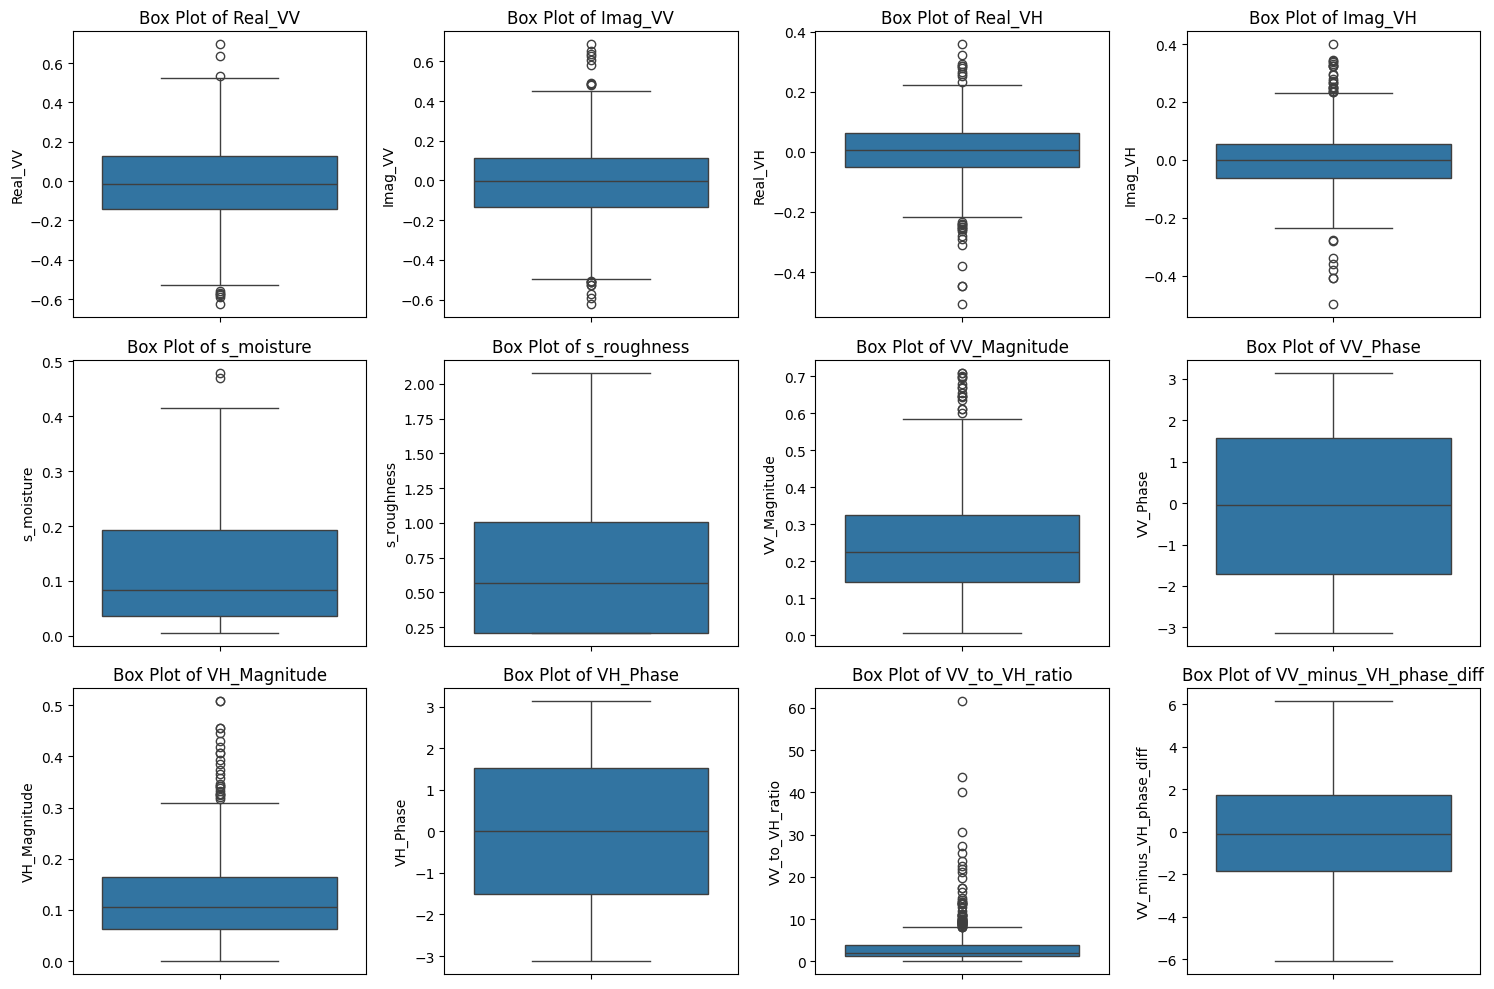

In [14]:
print("\nGenerating Box Plots to Visualize Potential Outliers...")

# Select only the numerical columns for box plotting
numerical_cols = dataset.select_dtypes(include=np.number).columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(y=dataset[col])
    plt.title(f'Box Plot of {col}')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

## Data preprocessing

### Subtask:
Prepare the data for modeling, including handling outliers if necessary and splitting the data into training and testing sets.


**Reasoning**:
Based on the box plots generated in the previous step, several columns show potential outliers. To prepare the data for modeling, I will proceed with splitting the data into training and testing sets, as handling outliers will be done after the split to avoid data leakage from the test set into the training set during any potential outlier treatment based on statistical properties (like mean, median, or standard deviation). The target variables are 's_moisture' and 's_roughness', and the features will be all other numerical columns.



In [15]:
# Define features (X) and target variables (y)
# Exclude the original real and imaginary parts and the calculated magnitude and phase if they are not used as features directly
# For this step, we will use all numerical columns except the targets as features.
feature_cols = dataset.select_dtypes(include=np.number).columns.drop(['s_moisture', 's_roughness'])
X = dataset[feature_cols]
y = dataset[['s_moisture', 's_roughness']]

# Handle potential NaN values resulting from division by zero in feature engineering
# Replace NaN with the mean of the column as a simple strategy for this step.
# More sophisticated strategies can be explored later if needed.
X = X.fillna(X.mean())

# Split the dataset into training and testing sets (80/20 ratio)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the resulting sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (510, 10)
Shape of X_test: (128, 10)
Shape of y_train: (510, 2)
Shape of y_test: (128, 2)


## Model building

### Subtask:
Build a machine learning model to predict soil moisture and/or surface roughness using the engineered features.


**Reasoning**:
Build a simple neural network model to predict soil moisture and surface roughness using the training data.



In [16]:
# Define a simple neural network model
class RegressionModel(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(RegressionModel, self).__init__()
        self.fc1 = nn.Linear(input_dim, 64)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, output_dim)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc3(x)
        return x

# Convert pandas DataFrames to PyTorch tensors
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32)

# Instantiate the model
input_dim = X_train_tensor.shape[1]
output_dim = y_train_tensor.shape[1]
model = RegressionModel(input_dim, output_dim)

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Train the model
num_epochs = 100
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)

    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch+1) % 10 == 0:
        print (f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

print("\nModel training complete.")

# Store the trained model (optional, but good practice)
# torch.save(model.state_dict(), 'regression_model.pth')

Epoch [10/100], Loss: 0.2300
Epoch [20/100], Loss: 0.1861
Epoch [30/100], Loss: 0.1739
Epoch [40/100], Loss: 0.1691
Epoch [50/100], Loss: 0.1648
Epoch [60/100], Loss: 0.1620
Epoch [70/100], Loss: 0.1594
Epoch [80/100], Loss: 0.1572
Epoch [90/100], Loss: 0.1552
Epoch [100/100], Loss: 0.1536

Model training complete.


## Model evaluation

### Subtask:
Evaluate the performance of the built model using appropriate metrics.


**Reasoning**:
Convert the test data to tensors, set the model to evaluation mode, get predictions, convert predictions and true values to numpy arrays, and calculate and print the MSE.



In [17]:
# Convert test data to PyTorch tensors
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32)

# Set the model to evaluation mode
model.eval()

# Get predictions from the model
with torch.no_grad():
    predictions = model(X_test_tensor)

# Convert predictions and true values to numpy arrays
predictions_np = predictions.detach().numpy()
y_test_np = y_test_tensor.numpy()

# Calculate Mean Squared Error
mse = mean_squared_error(y_test_np, predictions_np)

# Print the MSE
print(f"Mean Squared Error on the test set: {mse:.4f}")

Mean Squared Error on the test set: 0.1462


## Summary:

### Data Analysis Key Findings

*   Two new features, `VV_to_VH_ratio` and `VV_minus_VH_phase_diff`, were successfully engineered from the existing SAR data.
*   Box plots of the numerical features indicated the presence of potential outliers in several columns.
*   NaN values resulting from feature engineering were handled by replacing them with the mean of their respective columns.
*   The dataset was split into training (80%) and testing (20%) sets, resulting in training sets of shape (510, 10) for features and (510, 2) for targets, and testing sets of shape (128, 10) for features and (128, 2) for targets.
*   A simple neural network model was built and trained for 100 epochs, with the training loss decreasing to approximately 0.1536.
*   The trained model achieved a Mean Squared Error (MSE) of 0.1462 on the test set.

### Insights or Next Steps

*   Investigate strategies for handling the identified outliers in the training data to potentially improve model performance.
*   Explore different machine learning models or neural network architectures, as well as hyperparameter tuning, to potentially achieve a lower MSE on the test set.



Generating Scatter Plots of Predicted vs. Ground Truth Values...


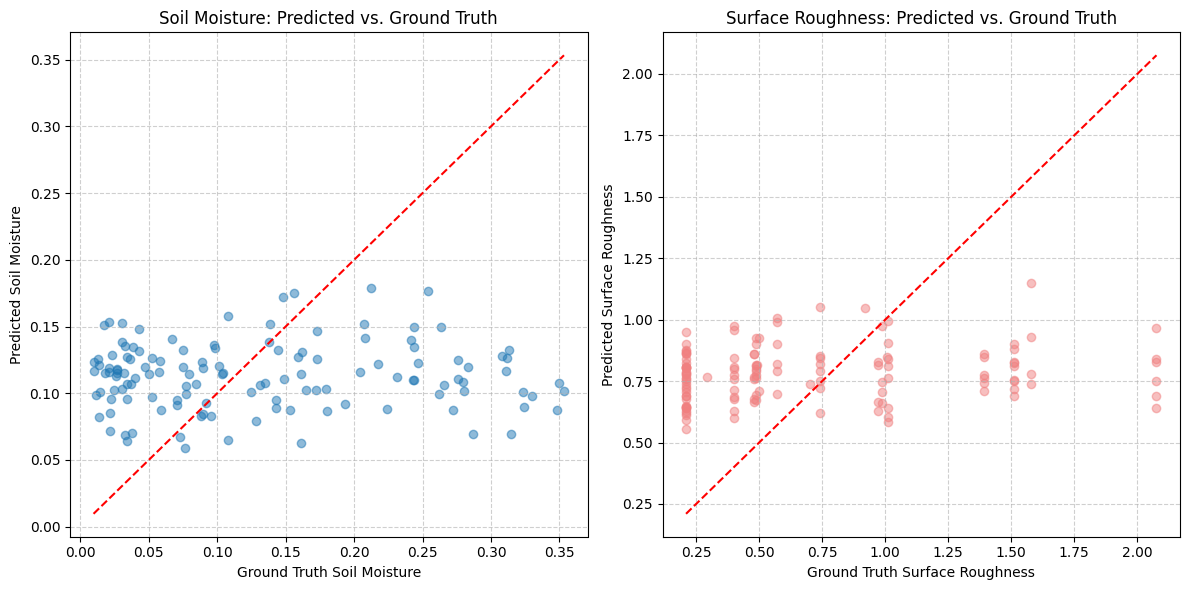

In [18]:
print("\nGenerating Scatter Plots of Predicted vs. Ground Truth Values...")

plt.figure(figsize=(12, 6))

# Scatter plot for Soil Moisture: Predicted vs. Ground Truth
plt.subplot(1, 2, 1)
plt.scatter(y_test_np[:, 0], predictions_np[:, 0], alpha=0.5)
plt.title('Soil Moisture: Predicted vs. Ground Truth')
plt.xlabel('Ground Truth Soil Moisture')
plt.ylabel('Predicted Soil Moisture')
plt.grid(True, linestyle='--', alpha=0.6)
plt.plot([min(y_test_np[:, 0]), max(y_test_np[:, 0])], [min(y_test_np[:, 0]), max(y_test_np[:, 0])], 'r--') # Add a diagonal line for reference

# Scatter plot for Surface Roughness: Predicted vs. Ground Truth
plt.subplot(1, 2, 2)
plt.scatter(y_test_np[:, 1], predictions_np[:, 1], alpha=0.5, color='lightcoral')
plt.title('Surface Roughness: Predicted vs. Ground Truth')
plt.xlabel('Ground Truth Surface Roughness')
plt.ylabel('Predicted Surface Roughness')
plt.grid(True, linestyle='--', alpha=0.6)
plt.plot([min(y_test_np[:, 1]), max(y_test_np[:, 1])], [min(y_test_np[:, 1]), max(y_test_np[:, 1])], 'r--') # Add a diagonal line for reference


plt.tight_layout()
plt.show()

Summary:

Data Analysis Key Findings

*  Two new features, VV_to_VH_ratio and VV_minus_VH_phase_diff, were successfully engineered from the existing SAR data.

*  Box plots of the numerical features indicated the presence of potential outliers in several columns.

*  NaN values resulting from feature engineering were handled by replacing them with the mean of their respective columns.

*   The dataset was split into training (80%) and testing (20%) sets, resulting in training sets of shape (510, 10) for features and (510, 2) for targets, and testing sets of shape (128, 10) for features and (128, 2) for targets.

*  A simple neural network model was built and trained for 100 epochs, with the training loss decreasing to approximately 0.1536.

*   The trained model achieved a Mean Squared Error (MSE) of 0.1462 on the test set.


*   Scatter plots of predicted vs. ground truth values provided a visual assessment of the model's performance for soil moisture and surface roughness, showing some alignment but also deviations from the ideal diagonal line.



**Insights or Next Steps**

*  Investigate strategies for handling the identified outliers in the training data to potentially improve model performance.

*   Explore different machine learning models or neural network architectures, as well as hyperparameter tuning, to potentially achieve a lower MSE on the test set.

*   Analyze the scatter plots of predicted vs. ground truth in more detail to understand where the model is performing well and where it is struggling.

*  Consider feature selection or engineering more advanced features to potentially improve model accuracy.


*   If possible, obtain more data or additional relevant features (e.g., land cover type, incidence angle) to potentially improve the model's ability to predict soil moisture and surface roughness.
